In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_excel("Data/AdventureWorks.xlsx")

#### Visualização

In [3]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


#### Numero de linhas X Coluna

In [4]:
df.shape

(904, 16)

#### Tipo dos dados

In [5]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
df['Valor Venda'].sum()

5984606.1426

In [7]:
#Qual o custo total
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
##Coluna de Lucro que será Receita - Custo
df["Lucro"]  = df["Valor Venda"] - df["Custo"]
#Coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]
#Apenas os dias
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [8]:
#Verificação de valores
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

#### Visualização dos dados

In [9]:
# otal de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

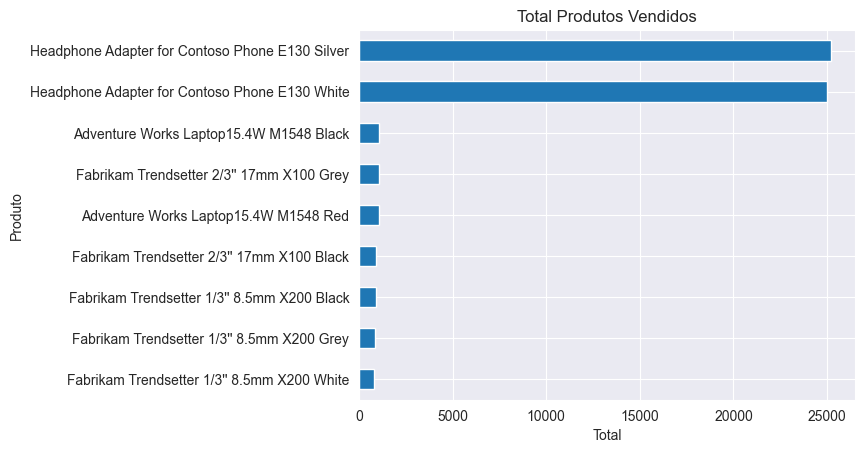

In [20]:
#Gráfico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh()
plt.title("Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")
plt.show()

Text(0, 0.5, 'Receita')

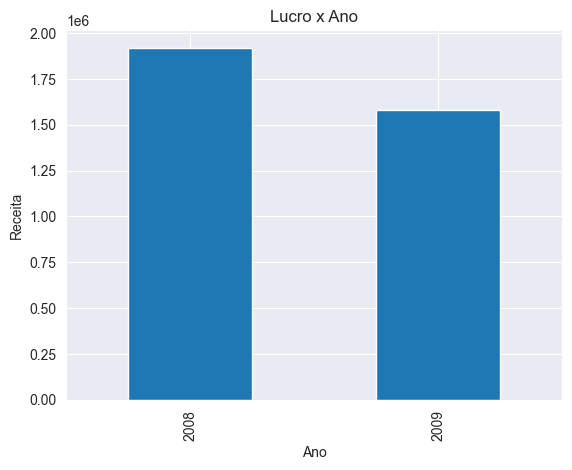

In [21]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar()
plt.title("Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.show()

In [22]:
df_2009 = df[df['Data Venda'].dt.year == 2009]

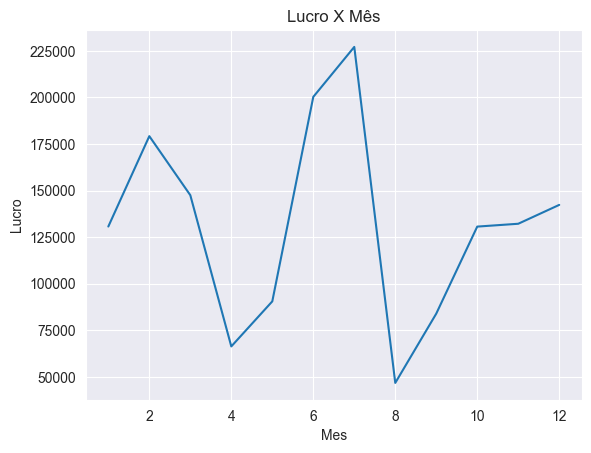

In [24]:
df_2009.groupby(df_2009["Data Venda"].dt.month)['Lucro'].sum().plot()
plt.title('Lucro X Mês')
plt.xlabel('Mes')
plt.ylabel('Lucro')
plt.show()

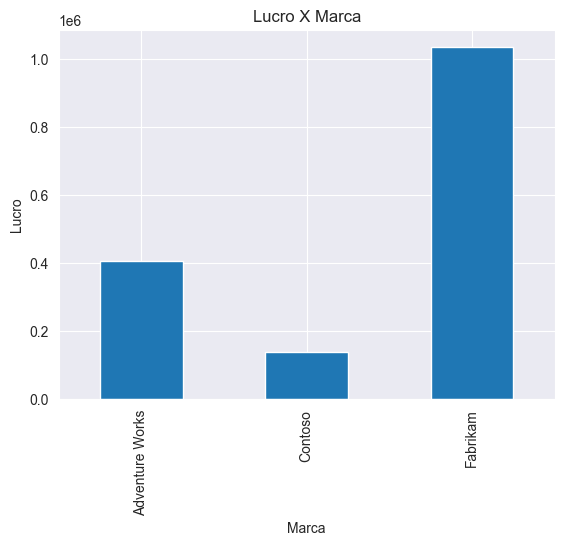

In [27]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar()
plt.title("Lucro X Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.show()

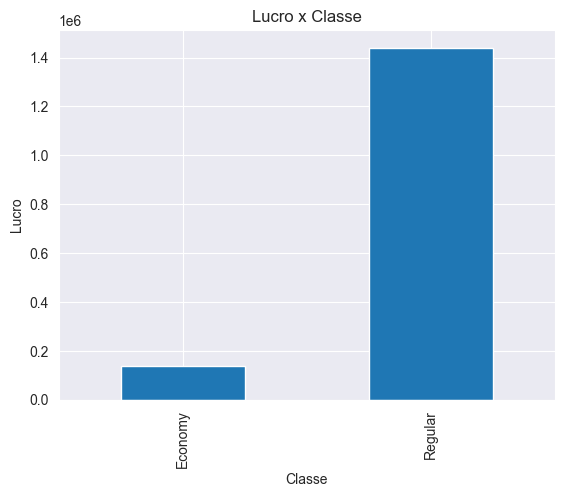

In [28]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar()
plt.title("Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.show()